In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews', parse_dates=['date'], index_col='date') 

# Clean data
df = df[~((df['value'] > df['value'].quantile(0.975)) | (df['value'] < df['value'].quantile(0.025)))]

def draw_line_plot(df):
    # Draw line plot
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.plot(df.index, df['value'])
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig


def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar = df_bar.resample('M').mean()
    df_bar = df_bar.rename(columns = {'value' : 'Average Page Views'})
    df_bar['Months'] = df_bar.index.strftime('%B')
    df_bar['Year'] = df_bar.index.strftime('%Y')
    month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

    # Draw bar plot
    sns.barplot(x='Year', y='Average Page Views', hue='Months', hue_order=month_order, data=df_bar)
    plt.xlabel('Year')
    plt.ylabel('Average Page Views')
    plt.title('Page Visits by Month and Year')
    fig = plt.gcf()
    fig.set_size_inches(10, 6)

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig


def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)




    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date') 

In [3]:
# Clean data
df = df[~((df['value'] > df['value'].quantile(0.975)) | (df['value'] < df['value'].quantile(0.025)))]

In [4]:
def draw_line_plot(df):
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.plot(df.index, df['value'])
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    fig.savefig('line_plot.png')
    return fig

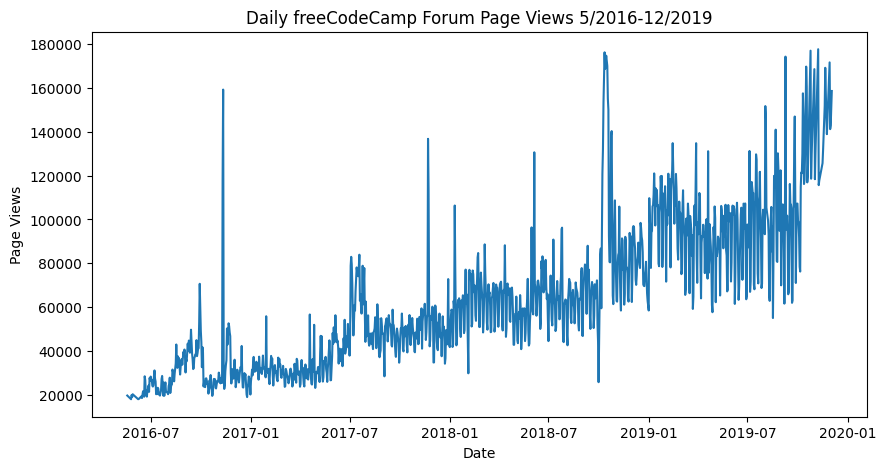

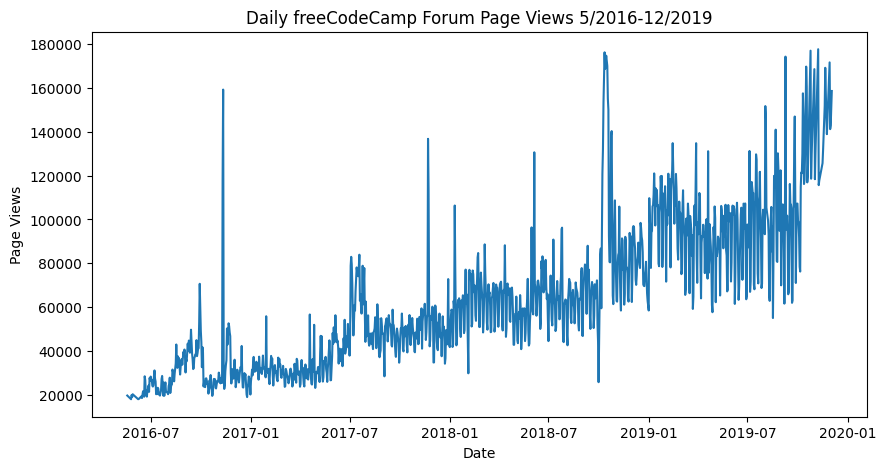

In [5]:
draw_line_plot(df)

In [40]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar = df_bar.resample('M').mean()
    df_bar = df_bar.rename(columns = {'value' : 'Average Page Views'})
    df_bar['Months'] = df_bar.index.strftime('%B')
    df_bar['Year'] = df_bar.index.strftime('%Y')
    month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

    # Draw bar plot
    sns.barplot(x='Year', y='Average Page Views', hue='Months', hue_order=month_order, data=df_bar)
    plt.xlabel('Year')
    plt.ylabel('Average Page Views')
    plt.title('Page Visits by Month and Year')
    fig = plt.gcf()
    fig.set_size_inches(10, 6)

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

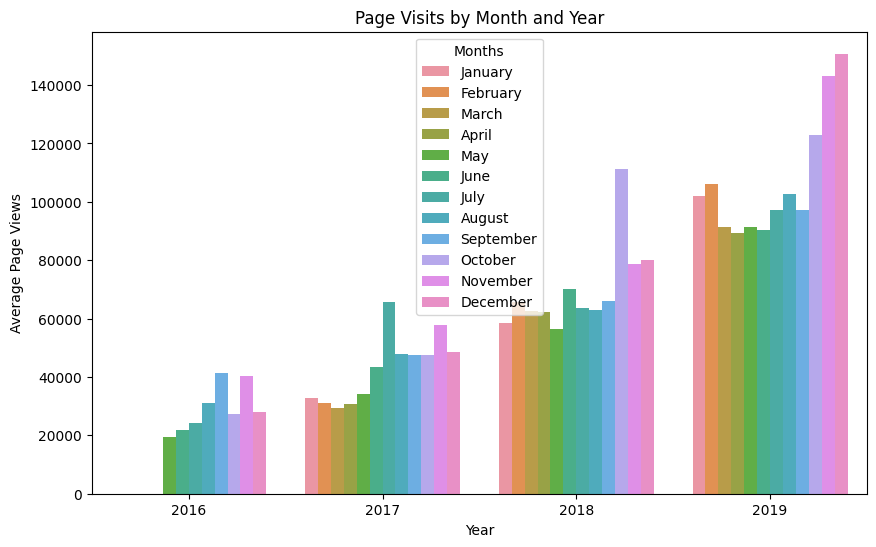

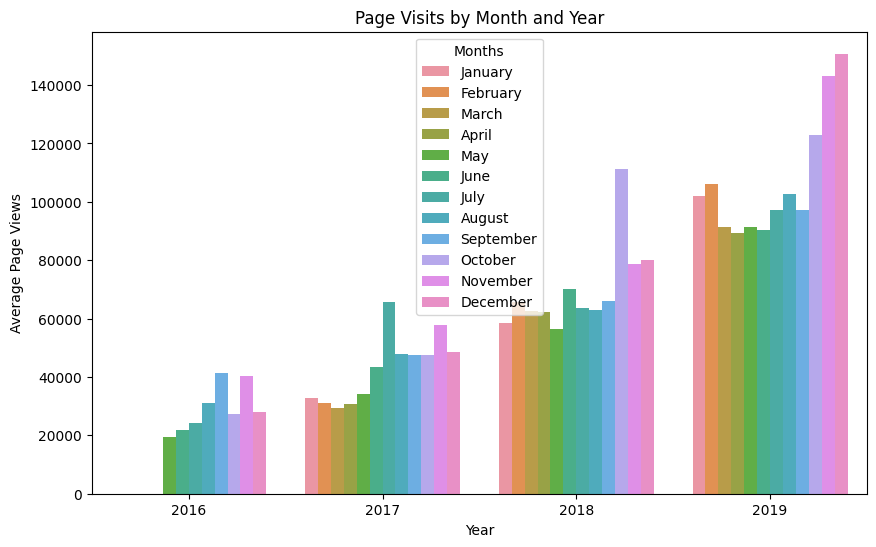

In [41]:
draw_bar_plot()

In [21]:
df_bar = df.copy()
df_bar = df_bar.resample('M').mean()
df_bar = df_bar.rename(columns = {'value' : 'Average Page Views'})
df_bar['Months'] = df_bar.index.strftime('%B')
df_bar['Year'] = df_bar.index.strftime('%Y')
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [26]:
df_bar.head()

,Average Page Views,Months,Year
date,,,
2016-05-31,19432.400000,May,2016
2016-06-30,21875.105263,June,2016
2016-07-31,24109.678571,July,2016
2016-08-31,31049.193548,August,2016
2016-09-30,41476.866667,September,2016


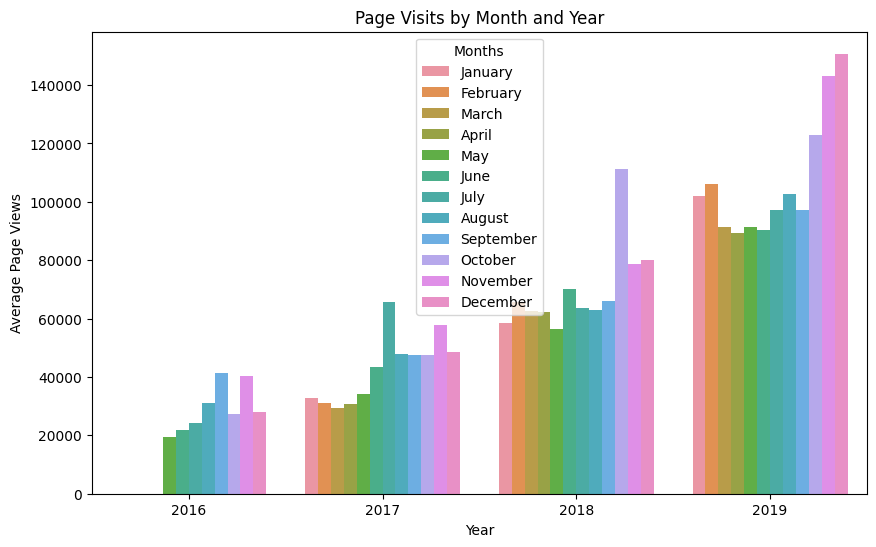

In [33]:
sns.barplot(x='Year', y='Average Page Views', hue='Months', hue_order=month_order, data=df_bar)
plt.xlabel('Year')
plt.ylabel('Average Page Views')
plt.title('Page Visits by Month and Year')
fig = plt.gcf()
fig.set_size_inches(10, 6)
fig.savefig('bar_plot.png')
plt.show()

In [ ]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    month_nums = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    df_box['month_num'] = df_box['month'].apply(lambda x: month_nums[month_order.index(x)])
    df_box = df_box.sort_values(by='month_num')

    # Draw box plots (using Seaborn)
    fig, axs = plt.subplots(ncols=2, figsize=(24, 10))
    sns.boxplot(x="year", y="value", data=df_box, ax=axs[0])
    sns.boxplot(x="month", y="value", data=df_box, ax=axs[1])
    axs[0].set_xlabel("Year")
    axs[0].set_ylabel("Page Views")
    axs[1].set_xlabel("Month")
    axs[1].set_ylabel("Page Views")
    axs[0].set_title("Year-wise Box Plot (Trend)")
    axs[1].set_title("Month-wise Box Plot (Seasonality)")

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

In [42]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
month_nums = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_box['month_num'] = df_box['month'].apply(lambda x: month_nums[month_order.index(x)])
df_box = df_box.sort_values(by='month_num')

In [43]:
df_box.head()

,date,value,year,month,month_num
210,2017-01-06,37353,2017,Jan,1
937,2019-01-06,94108,2019,Jan,1
936,2019-01-05,77897,2019,Jan,1
935,2019-01-04,94514,2019,Jan,1
934,2019-01-03,100710,2019,Jan,1


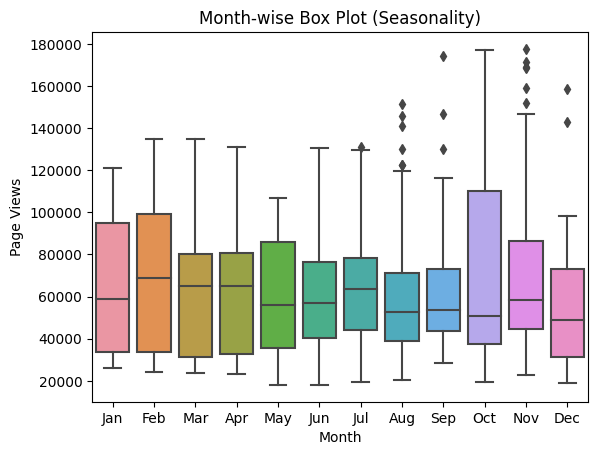

In [44]:
sns.boxplot(x="month", y="value", data=df_box)
plt.xlabel("Month")
plt.ylabel("Page Views")
plt.title("Month-wise Box Plot (Seasonality)")
plt.show()

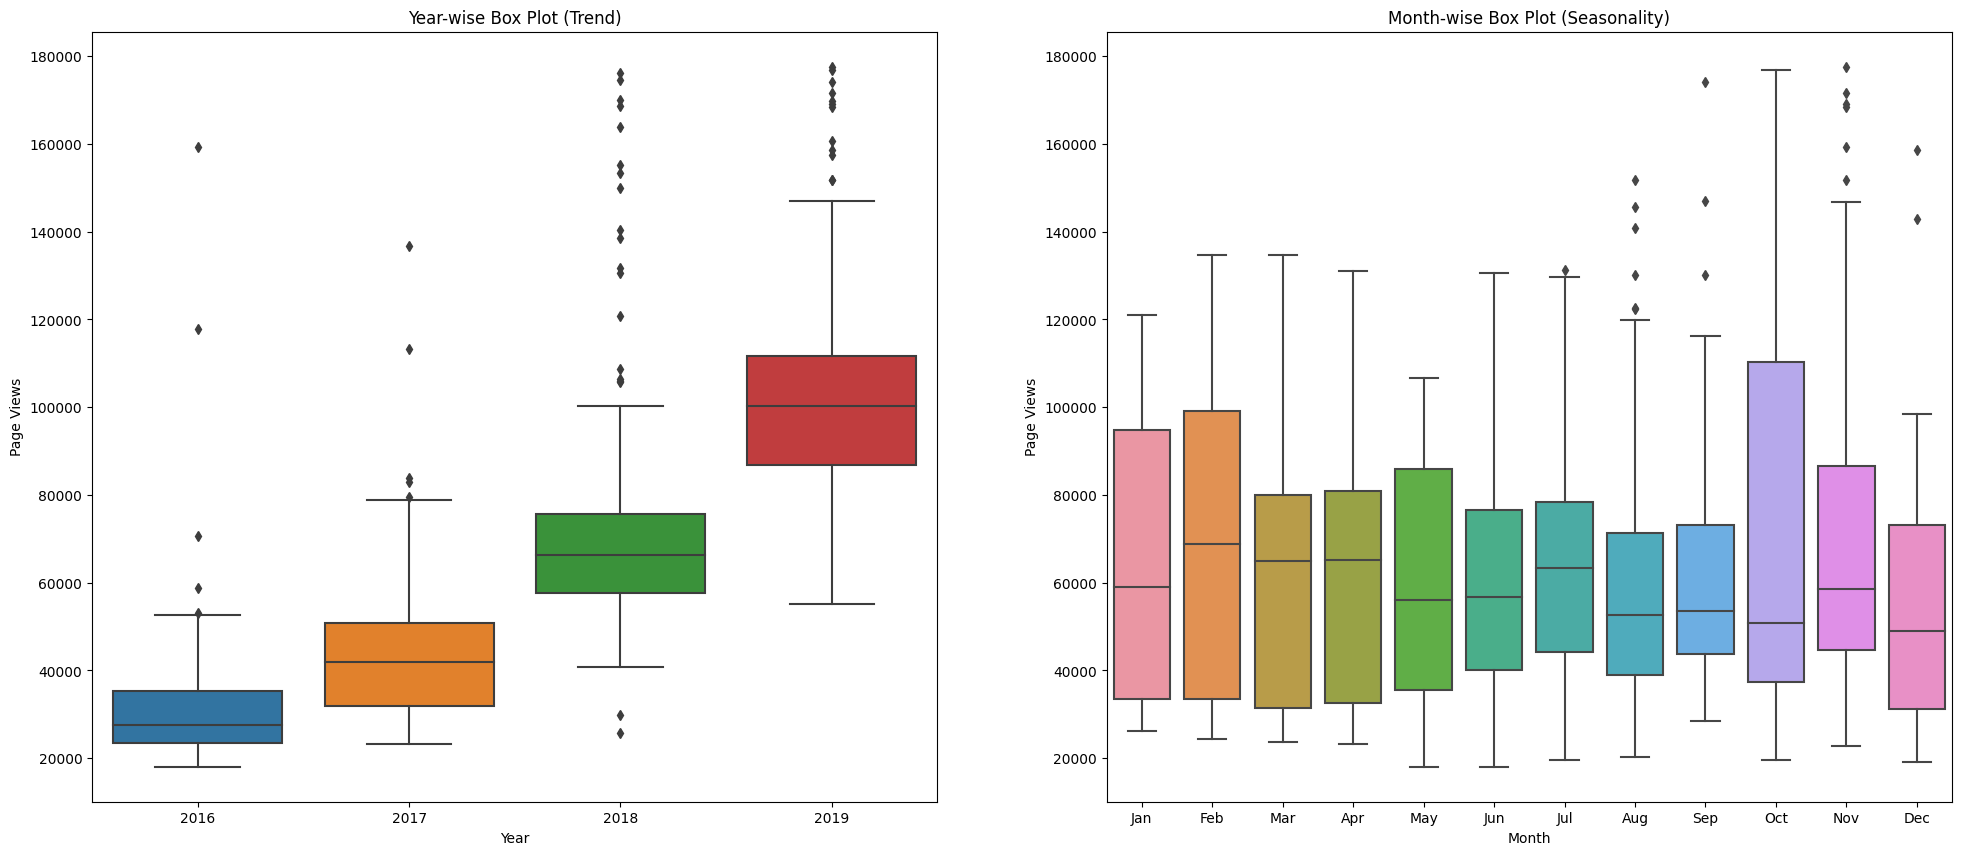

In [45]:
# Draw box plots (using Seaborn)
fig, axs = plt.subplots(ncols=2, figsize=(24, 10))
sns.boxplot(x="year", y="value", data=df_box, ax=axs[0])
sns.boxplot(x="month", y="value", data=df_box, ax=axs[1])
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Page Views")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Page Views")
axs[0].set_title("Year-wise Box Plot (Trend)")
axs[1].set_title("Month-wise Box Plot (Seasonality)")
plt.show()